#  LSTM-based stock time series forecasting #

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras import optimizers
from matplotlib.pyplot import *
import time
from sklearn.metrics import confusion_matrix

In [44]:
def creat_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i+look_back])
    return np.array(dataX), np.array(dataY)


In [45]:
dataframe = pd.read_csv('zgpa_train.csv',
                        header=0, parse_dates=[0],
                        index_col=0, usecols=[0, 5], squeeze=True)
dataset = dataframe.values
dataframe.head(10)


/var/folders/12/bdpxcrts1058cvnjz3lb72j40000gn/T/ipykernel_2856/2640824600.py:1: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  dataframe = pd.read_csv('zgpa_train.csv',


date
2016-01-04    70997200
2016-01-05    87498504
2016-01-06    48012112
2016-01-07    23647604
2016-01-08    98239664
2016-01-11    99355696
2016-01-12    74380912
2016-01-13    62533020
2016-01-14    79722712
2016-01-15    59140260
Name: volume, dtype: int64

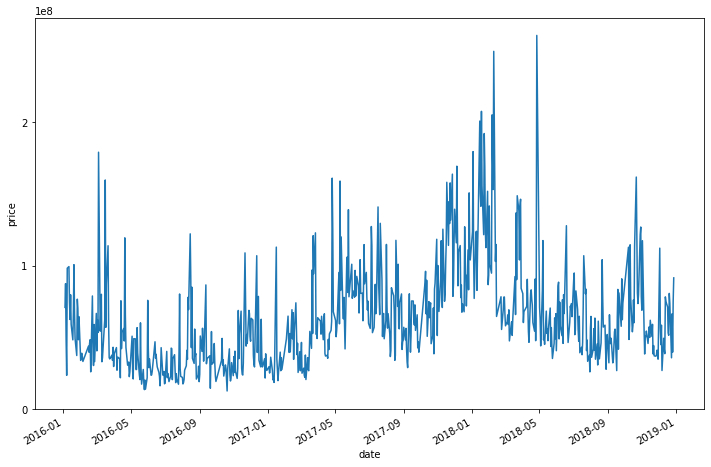

In [46]:
plt.figure(figsize=(12, 8))
dataframe.plot()
plt.ylabel('price')
plt.yticks(np.arange(0, 300000000, 100000000))
plt.show()

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
#All data normalised to within the 0-1 interval, normalised data

In [48]:
train_size = int(len(dataset)*0.8)
test_size = len(dataset)-train_size
train, test = dataset[0: train_size], dataset[train_size: len(dataset)]
#Splitting the dataset

In [49]:
look_back = 1
trainX, trainY = creat_dataset(train, look_back)
testX, testY = creat_dataset(test, look_back)
#The previous function is called to generate x, y for the training and test sets respectively

In [50]:

model = Sequential()

model.add(LSTM(input_dim=1, units=50, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=50, units=100, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(input_dim=100, units=200, return_sequences=True))
#model.add(Dropout(0.2))

model.add(LSTM(300, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(100))
model.add(Dense(units=1))

model.add(Activation('relu'))
start = time.time()
model.compile(loss='mean_squared_error', optimizer='Adam')
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, None, 50)          10400     
                                                                 
 lstm_13 (LSTM)              (None, None, 100)         60400     
                                                                 
 lstm_14 (LSTM)              (None, None, 200)         240800    
                                                                 
 lstm_15 (LSTM)              (None, 300)               601200    
                                                                 
 dropout_4 (Dropout)         (None, 300)               0         
                                                                 
 dense_6 (Dense)             (None, 100)               30100     
                                                                 
 dense_7 (Dense)             (None, 1)                

In [52]:
epochs = 50
batch_size = 16
n_hidden = 30

history = model.fit(trainX, trainY, batch_size=64, 
                    epochs=epochs,
                    validation_split=0.1, 
                   )
model.compile(loss='mean_squared_error', optimizer='Adam', metrics=['accuracy'])

print('compilatiom time:', time.time()-start)
print(confusion_matrix(testY, model.predict(testX)))



Epoch 1/50


2022-05-12 20:52:10.407245: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:10.780976: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:10.810088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:10.845129: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:10.891838: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:10.972974: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1/9 [==>...........................] - ETA: 21s - loss: 0.0093 - accuracy: 0.0000e+00

2022-05-12 20:52:11.040169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:11.108078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:11.173862: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - ETA: 0s - loss: 0.0131 - accuracy: 0.0019

2022-05-12 20:52:11.983501: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:12.119556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:12.145161: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:12.175732: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 4s 127ms/step - loss: 0.0131 - accuracy: 0.0019 - val_loss: 0.0196 - val_accuracy: 0.0000e+00
Epoch 2/50
7/9 [======================>.......] - ETA: 0s - loss: 0.0130 - accuracy: 0.0022  

2022-05-12 20:52:12.207124: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


9/9 [==============================] - 0s 22ms/step - loss: 0.0126 - accuracy: 0.0019 - val_loss: 0.0205 - val_accuracy: 0.0000e+00
Epoch 3/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0125 - accuracy: 0.0019 - val_loss: 0.0193 - val_accuracy: 0.0000e+00
Epoch 4/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0125 - accuracy: 0.0019 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 5/50
9/9 [==============================] - 0s 20ms/step - loss: 0.0127 - accuracy: 0.0019 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 6/50
9/9 [==============================] - 0s 19ms/step - loss: 0.0125 - accuracy: 0.0019 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 7/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0126 - accuracy: 0.0019 - val_loss: 0.0198 - val_accuracy: 0.0000e+00
Epoch 8/50
9/9 [==============================] - 0s 18ms/step - loss: 0.0124 - accuracy: 0.0019 - val_loss: 0.0201 - val_accuracy: 0.0000e+00
Epoch 9/50

2022-05-12 20:52:22.980543: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:23.103893: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:23.133147: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:23.186142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-05-12 20:52:23.221960: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


ValueError: continuous is not supported

In [16]:
epochs = 50
batch_size = 16
n_hidden = 30

history = model.fit(trainX, trainY, batch_size=64, 
                    epochs=epochs,
                    validation_split=0.1, 
                    verbose=2)
print('compilatiom time:', time.time()-start)


Epoch 1/50
9/9 - 0s - loss: 0.0127 - val_loss: 0.0198 - 218ms/epoch - 24ms/step
Epoch 2/50
9/9 - 0s - loss: 0.0126 - val_loss: 0.0203 - 134ms/epoch - 15ms/step
Epoch 3/50
9/9 - 0s - loss: 0.0124 - val_loss: 0.0195 - 134ms/epoch - 15ms/step
Epoch 4/50
9/9 - 0s - loss: 0.0127 - val_loss: 0.0207 - 132ms/epoch - 15ms/step
Epoch 5/50
9/9 - 0s - loss: 0.0129 - val_loss: 0.0192 - 161ms/epoch - 18ms/step
Epoch 6/50
9/9 - 0s - loss: 0.0126 - val_loss: 0.0202 - 134ms/epoch - 15ms/step
Epoch 7/50
9/9 - 0s - loss: 0.0125 - val_loss: 0.0191 - 133ms/epoch - 15ms/step
Epoch 8/50
9/9 - 0s - loss: 0.0126 - val_loss: 0.0196 - 131ms/epoch - 15ms/step
Epoch 9/50
9/9 - 0s - loss: 0.0134 - val_loss: 0.0209 - 136ms/epoch - 15ms/step
Epoch 10/50
9/9 - 0s - loss: 0.0126 - val_loss: 0.0192 - 134ms/epoch - 15ms/step
Epoch 11/50
9/9 - 0s - loss: 0.0125 - val_loss: 0.0202 - 132ms/epoch - 15ms/step
Epoch 12/50
9/9 - 0s - loss: 0.0128 - val_loss: 0.0200 - 142ms/epoch - 16ms/step
Epoch 13/50
9/9 - 0s - loss: 0.0128 -

In [85]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [86]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
#Inverse normalisation to restore the original data range.

In [102]:
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict[:, 0]))
print('Train Sccore %.2f RMSE' %(testScore))


Train Sccore 4519277968675918193885184.00 RMSE
Train Sccore 4028889487158365688692736.00 RMSE


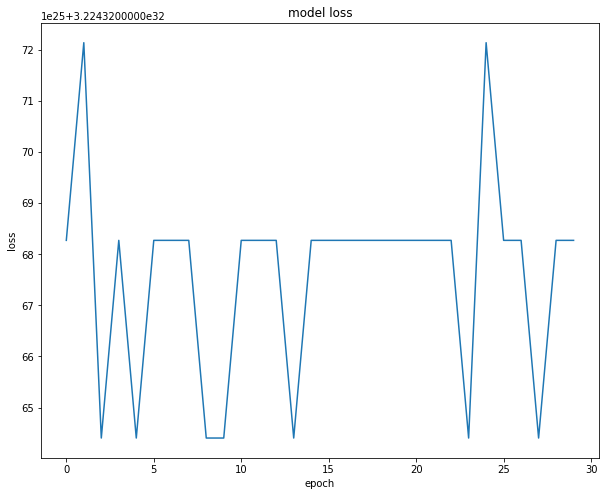

In [103]:
fig1 = plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()


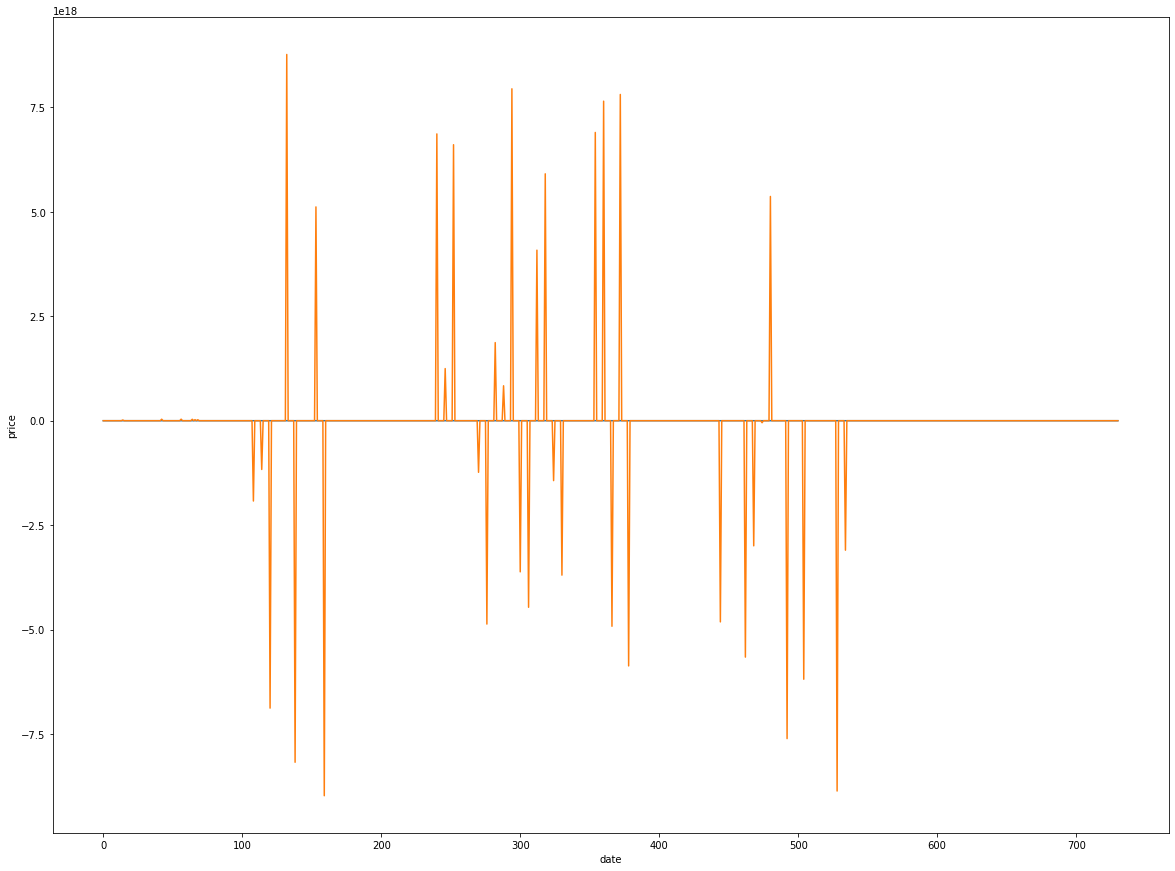

In [104]:
fig2 = plt.figure(figsize=(20, 15))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.ylabel('price')
plt.xlabel('date')
plt.show()


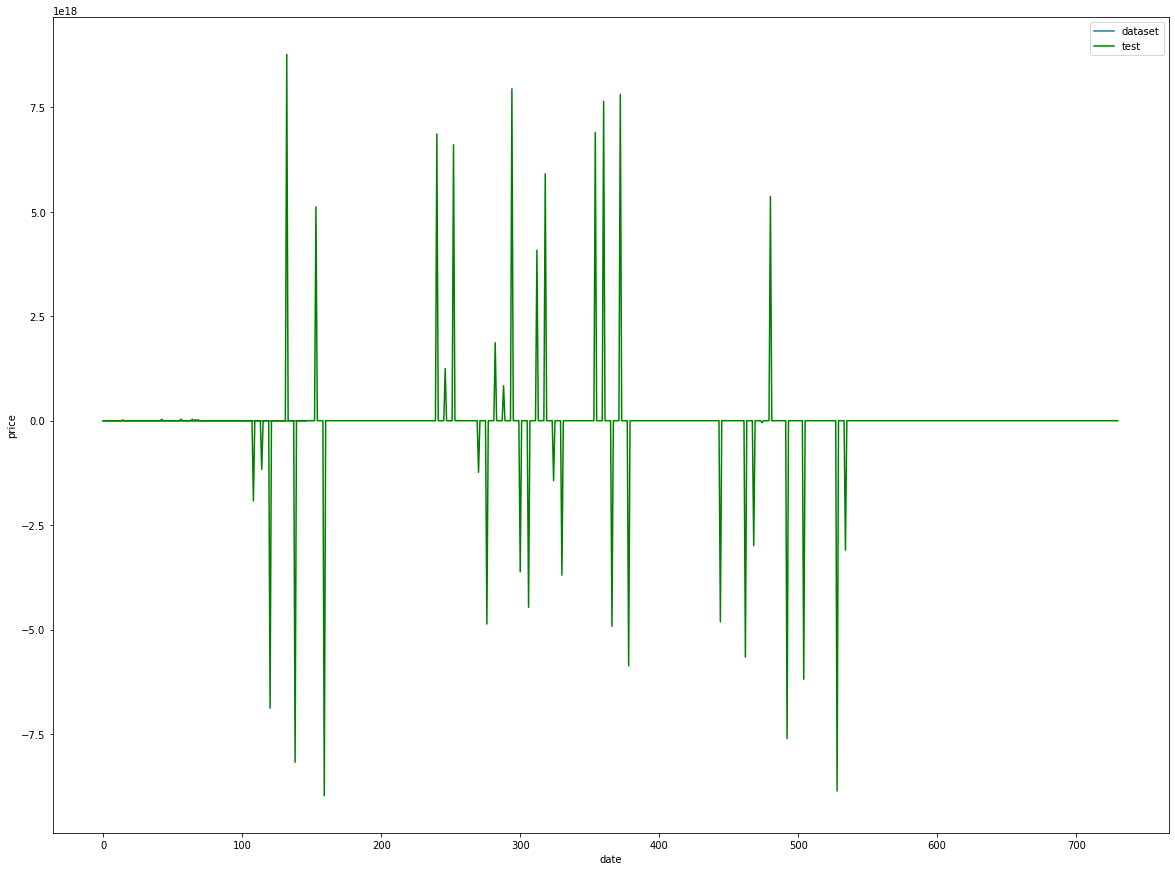

In [105]:
fig3 = plt.figure(figsize=(20, 15))
plt.plot(np.arange(train_size+1, len(dataset)+1, 1),  label='dataset')
plt.plot(testPredictPlot, 'g', label='test')
plt.ylabel('price')
plt.xlabel('date')
plt.legend()
plt.show()
